In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx


# new for data viz
import seaborn as sns

# to explore point patterns
from pointpats import centrography
from matplotlib.patches import Ellipse
import numpy

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


# CPP Map

In [2]:
cpp = gpd.read_file('California_Power_Plants_MP Cleaned 3.1.21.csv')

In [3]:
type(cpp)

geopandas.geodataframe.GeoDataFrame

In [4]:
cpp.shape

(871, 25)

In [5]:
cpp.head(10)

,Plant_ID,Plant_Label,MW,Gross_MWh,Net_MWh,General_Fuel,Status,Online_Year,REAT_ID,County,...,Congressional_District,CES30_PercentileRange,CES30_Percentile,Longitude,Latitude,Operation_Job,Capacity_Factor,Income_Percent,Project_Location,geometry
0,E0006,Burney Mtn. Power,11,,,Biomass,Operating,1985,C-3,Shasta,...,Congressional District 1,50-55%,51,-121.6395876,40.91000072,,,61,Neither Low Income Nor Disadvantaged Community,None
1,E0056,Mt. Lassen Power,11.4,,,Biomass,Operating,1985,C-4,Lassen,...,Congressional District 1,30-35%,30,-121.0178306,40.29741968,,,66,Neither Low Income Nor Disadvantaged Community,None
2,E0113,Commerce,11.5,,,Biomass,Operating,1986,F-11,Los Angeles,...,Congressional District 40,95-100% (highest scores),97,-118.1537915,33.99486138,,,75,Disadvantaged Community,None
3,E0026,Collins Pine,12,15398.03,8763,Biomass,Operating,1985,C-4,Plumas,...,Congressional District 1,20-25%,24,-121.2439679,40.30207759,,0.08313411,70,Neither Low Income Nor Disadvantaged Community,None
4,E0018,Chowchilla II,12.5,79062.01,67181,Biomass,Standby,2008,D-8,Madera,...,Congressional District 16,70-75%,72,-120.2488396,37.10692537,,0.61184882,48,Low Income,None
5,E0017,Chowchilla I,12.5,,,Biomass,Operating,,D-8,Madera,...,Congressional District 16,70-75%,72,-120.2483803,37.10726315,,,48,Low Income,None
6,E0007,El Nido,12.5,74997,63344,Biomass,Standby,2008,D-8,Merced,...,Congressional District 16,80-85%,81,-120.4905055,37.18700309,,0.57690346,73,Disadvantaged Community,None
7,E0082,SPI - Susanville,12.65,,,Biomass,Operating,1985,D-4,Lassen,...,Congressional District 1,25-30%,29,-120.6453826,40.40864222,,,44,Low Income,None
8,E0243,Roseburg Forest,13.39,59298,56150,Biomass,Operating,2011,B-3,Siskiyou,...,Congressional District 1,60-65%,64,-122.3769502,41.43431054,,0.47739389,71,Neither Low Income Nor Disadvantaged Community,None
9,E0089,Soledad Energy,13.4,,,Biomass,Operating,2000,C-9,Monterey,...,Congressional District 20,45-50%,47,-121.3156098,36.41629355,,,64,Neither Low Income Nor Disadvantaged Community,None


In [6]:
cpp.info

<bound method DataFrame.info of     Plant_ID        Plant_Label      MW  Gross_MWh Net_MWh General_Fuel  \
0      E0006  Burney Mtn. Power      11                         Biomass   
1      E0056   Mt. Lassen Power    11.4                         Biomass   
2      E0113           Commerce    11.5                         Biomass   
3      E0026      Collins Pine       12   15398.03    8763      Biomass   
4      E0018      Chowchilla II    12.5   79062.01   67181      Biomass   
..       ...                ...     ...        ...     ...          ...   
866    W0414    North Sky River     162  459332.71  459333         Wind   
867    W0389             Alta V     168  303955.51  303956         Wind   
868    W0415     Pinyon Pines I     168  339370.64  339371         Wind   
869    W0420            Manzana     189  514106.26  514106         Wind   
870    W0409   Ocotillo Express  265.44     575314  575314         Wind   

        Status Online_Year REAT_ID       County  ...  \
0    Operat

In [7]:
cpp.columns = ['Plant_ID',
 'Name',
 'MW',
 'Gross_MWh',
 'Net_MWh',
 'Fuel_Type',
 'Status',
 'Online_Year',
 'REAT_ID',
 'County',
 'State',
 'Renewable_Energy',
 'Jobs',
 'Senate_District',
 'Assembly_District',
 'Congressional_District',
 'CES30_PercentileRange',
 'CES30_Percentile',
 'Lon',
 'Lat',
 'Operation_Job',
 'Capacity_Factor',
 'Income_Percent',
 'Project_Location',
 'geometry']

In [8]:
# define variable with desired columns 
desired_columns = [
 'Name',
 'Fuel_Type',
 'Status',
 'County',
 'State',
 'Renewable_Energy',
 'Jobs',
 'CES30_PercentileRange',
 'CES30_Percentile',
 'Lon',
 'Lat',
 'Income_Percent',
 'Project_Location',
 'geometry']

# redefine our dataframe with just our desired columns.

cpp_trim = cpp[desired_columns].copy()

# check out the new dataframe! 
cpp_trim

,Name,Fuel_Type,Status,County,State,Renewable_Energy,Jobs,CES30_PercentileRange,CES30_Percentile,Lon,Lat,Income_Percent,Project_Location,geometry
0,Burney Mtn. Power,Biomass,Operating,Shasta,CA,1,19.8,50-55%,51,-121.6395876,40.91000072,61,Neither Low Income Nor Disadvantaged Community,None
1,Mt. Lassen Power,Biomass,Operating,Lassen,CA,1,20.5,30-35%,30,-121.0178306,40.29741968,66,Neither Low Income Nor Disadvantaged Community,None
2,Commerce,Biomass,Operating,Los Angeles,CA,1,20.7,95-100% (highest scores),97,-118.1537915,33.99486138,75,Disadvantaged Community,None
3,Collins Pine,Biomass,Operating,Plumas,CA,1,21.6,20-25%,24,-121.2439679,40.30207759,70,Neither Low Income Nor Disadvantaged Community,None
4,Chowchilla II,Biomass,Standby,Madera,CA,1,22.5,70-75%,72,-120.2488396,37.10692537,48,Low Income,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,North Sky River,Wind,Operating,Kern,CA,1,239.8,55-60%,58,-118.1804757,35.3502891,60,Low Income,None
867,Alta V,Wind,Operating,Kern,CA,1,248.6,75-80%,79,-118.2376542,35.00079663,51,Low Income and Disadvantaged Community,None
868,Pinyon Pines I,Wind,Operating,Kern,CA,1,248.6,75-80%,79,-118.2143789,35.03973709,51,Low Income and Disadvantaged Community,None
869,Manzana,Wind,Operating,Kern,CA,1,279.7,70-75%,71,-118.4678447,34.94433117,96,Neither Low Income Nor Disadvantaged Community,None


In [9]:
# We want to convert coordinates  and jobs to floats. 

cpp_trim.Lon = cpp_trim.Lon.astype('float')
cpp_trim.Lat = cpp_trim.Lat.astype('float')
cpp_trim.Jobs = cpp_trim.Jobs.astype('float')

In [10]:
cpp_trim = gpd.GeoDataFrame(cpp_trim, 
                         crs='EPSG:4326',
                         geometry=gpd.points_from_xy(cpp_trim.Lon, cpp_trim.Lat))

cpp_trim.head(5)

,Name,Fuel_Type,Status,County,State,Renewable_Energy,Jobs,CES30_PercentileRange,CES30_Percentile,Lon,Lat,Income_Percent,Project_Location,geometry
0,Burney Mtn. Power,Biomass,Operating,Shasta,CA,1,19.8,50-55%,51,-121.639588,40.910001,61,Neither Low Income Nor Disadvantaged Community,POINT (-121.63959 40.91000)
1,Mt. Lassen Power,Biomass,Operating,Lassen,CA,1,20.5,30-35%,30,-121.017831,40.297420,66,Neither Low Income Nor Disadvantaged Community,POINT (-121.01783 40.29742)
2,Commerce,Biomass,Operating,Los Angeles,CA,1,20.7,95-100% (highest scores),97,-118.153791,33.994861,75,Disadvantaged Community,POINT (-118.15379 33.99486)
3,Collins Pine,Biomass,Operating,Plumas,CA,1,21.6,20-25%,24,-121.243968,40.302078,70,Neither Low Income Nor Disadvantaged Community,POINT (-121.24397 40.30208)
4,Chowchilla II,Biomass,Standby,Madera,CA,1,22.5,70-75%,72,-120.248840,37.106925,48,Low Income,POINT (-120.24884 37.10693)


In [11]:
# check crs type

cpp_trim.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Demographics (CES)

In [12]:
gdf_ces = gpd.read_file('CES3June2018Update.shp')

In [13]:
type(gdf_ces)

geopandas.geodataframe.GeoDataFrame

In [14]:
gdf_ces.crs

<Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: USA - California
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [15]:
#define variable with desired columns 
columns_to_keep = ['tract', 'pop2010', 'California', 'ZIP', 'City', 'Longitude', 'Latitude', 'CIscore', 'CIscoreP', 'edu', 'eduP', 'pov', 'povP', 'unemp', 'unempP', 'Pop_11_64_', 'Elderly_ov', 'Hispanic_p', 'White_pct', 'African_Am', 'Native_Ame', 'Asian_Amer', 'Other_pct', 'geometry']

#redfine dataframe with desired columns 
gdf_ces = gdf_ces[columns_to_keep]

# check to make sure 

gdf_ces.head()

,tract,pop2010,California,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,edu,...,unempP,Pop_11_64_,Elderly_ov,Hispanic_p,White_pct,African_Am,Native_Ame,Asian_Amer,Other_pct,geometry
0,6.083002e+09,3930,Santa Barbara,93454,Santa Maria,-120.427059,34.930669,29.51,59,24.8,...,32,70.5,13.1,57.5,31.3,1.9,0.5,7.2,1.6,"POLYGON ((-39795.070 -341919.191, -38126.384 -..."
1,6.083002e+09,11406,Santa Barbara,93455,Santa Maria,-120.478083,34.928796,33.17,65,46.0,...,61,73.2,6.2,74.0,17.4,1.4,0.2,5.5,1.6,"POLYGON ((-39795.070 -341919.191, -39803.632 -..."
2,6.083002e+09,2084,Santa Barbara,93454,Santa Maria,-120.426777,34.942111,22.85,45,26.2,...,7,72.5,13.2,52.2,40.9,0.8,0.5,2.9,2.6,"POLYGON ((-38115.747 -341130.248, -38126.384 -..."
3,6.083002e+09,4375,Santa Barbara,93455,Santa Maria,-120.410028,34.871428,4.45,2,6.1,...,47,74.7,14.4,20.0,71.9,1.0,0.6,4.0,2.6,"POLYGON ((-37341.662 -348530.437, -37252.307 -..."
4,6.083002e+09,3826,Santa Barbara,93455,Santa Maria,-120.427716,34.872288,5.28,3,12.1,...,32,73.6,15.9,25.7,65.4,1.5,0.8,3.5,3.2,"POLYGON ((-39465.107 -348499.262, -38244.305 -..."


In [38]:
list(gdf_ces)

['tract',
 'pop2010',
 'California',
 'ZIP',
 'City',
 'Longitude',
 'Latitude',
 'CIscore',
 'CIscoreP',
 'edu',
 'eduP',
 'pov',
 'povP',
 'unemp',
 'unempP',
 'Pop_11_64_',
 'Elderly_ov',
 'Hispanic_p',
 'White_pct',
 'African_Am',
 'Native_Ame',
 'Asian_Amer',
 'Other_pct',
 'geometry']

## White % of tract

In [16]:
# to sort the data by race
gdf_whitepct = gdf_ces.sort_values(by='White_pct', ascending = False)

# check my work 
gdf_whitepct.head()

,tract,pop2010,California,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,edu,...,unempP,Pop_11_64_,Elderly_ov,Hispanic_p,White_pct,African_Am,Native_Ame,Asian_Amer,Other_pct,geometry
2549,6.073010e+09,2,San Diego,92118,Coronado,-117.188700,32.712244,0.00,0,0.0,...,0,0.0,100.0,0.0,100.0,0.0,0.0,0.0,0.0,"POLYGON ((262366.045 -583146.561, 262604.559 -..."
6617,6.037980e+09,2,Los Angeles,93535,Lancaster,-117.966779,34.809854,0.00,0,0.0,...,0,0.0,100.0,0.0,100.0,0.0,0.0,0.0,0.0,"POLYGON ((203452.085 -352453.765, 203620.978 -..."
7386,6.037980e+09,1,Los Angeles,90807,Long Beach,-118.153909,33.815252,0.00,0,0.0,...,0,0.0,100.0,0.0,100.0,0.0,0.0,0.0,0.0,"POLYGON ((171183.679 -463624.694, 171185.957 -..."
3977,6.065051e+09,6956,Riverside,92211,Palm Desert,-116.295516,33.778766,9.44,12,1.6,...,0,16.7,83.2,2.5,94.7,0.8,0.1,1.4,0.5,"POLYGON ((343986.138 -464620.886, 344049.102 -..."
248,6.061022e+09,961,Placer,96145,Tahoe City,-120.218103,39.116434,6.65,6,0.0,...,0,80.6,10.8,2.3,94.4,1.0,0.0,1.2,1.0,"POLYGON ((-16571.650 126950.134, -16286.328 12..."


In [17]:
# create a new dataframe with just the columns I want. 

gdf_whitepct[['California','City','White_pct', 'geometry']]

,California,City,White_pct,geometry
2549,San Diego,Coronado,100.0,"POLYGON ((262366.045 -583146.561, 262604.559 -..."
6617,Los Angeles,Lancaster,100.0,"POLYGON ((203452.085 -352453.765, 203620.978 -..."
7386,Los Angeles,Long Beach,100.0,"POLYGON ((171183.679 -463624.694, 171185.957 -..."
3977,Riverside,Palm Desert,94.7,"POLYGON ((343986.138 -464620.886, 344049.102 -..."
248,Placer,Tahoe City,94.4,"POLYGON ((-16571.650 126950.134, -16286.328 12..."
...,...,...,...,...
6619,Los Angeles,Burbank,0.0,"POLYGON ((152152.814 -422044.331, 152151.843 -..."
6618,Los Angeles,Carson,0.0,"POLYGON ((164431.756 -466300.598, 164186.508 -..."
5952,Los Angeles,Los Angeles,0.0,"POLYGON ((149211.561 -449854.319, 149200.475 -..."
156,Monterey,Salinas,0.0,"POLYGON ((-142025.793 -149808.278, -142206.024..."


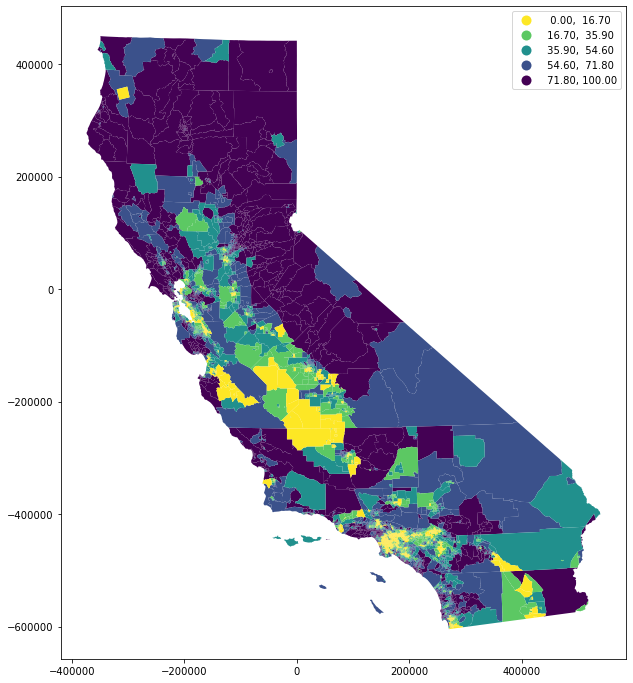

In [27]:
# to map the sorted dataframe using geopandas chloropleth maps
gdf_whitepct.plot(figsize=(12,12),
                   column='White_pct',
                   cmap='viridis_r',
                   legend=True,
                   scheme='NaturalBreaks')

In [28]:
#reproject gdf_whitepct to web mercator. 

gdf_whitepct = gdf_whitepct.to_crs(epsg=3857)

#reproject cpp_trim to web mercator
cpp_trim = cpp_trim.to_crs(epsg=3857)

# check work

print(gdf_whitepct.crs)

epsg:3857


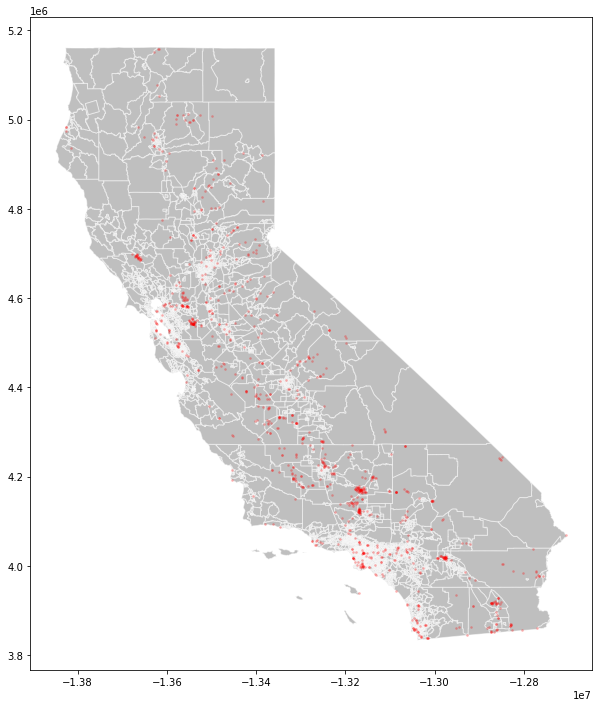

In [29]:
# set up the plot canvas with plt.subplots
fig, ax = plt.subplots(figsize=(12, 12))

# block groups
gdf_whitepct.plot(ax=ax, # this puts it in the ax plot
        color='gray', 
        edgecolor='white',
        alpha=0.5)

# cpp_trim
cpp_trim.plot(ax=ax, # this also puts it in the same ax plot
            color='red',
            markersize=3,
            alpha=0.2)

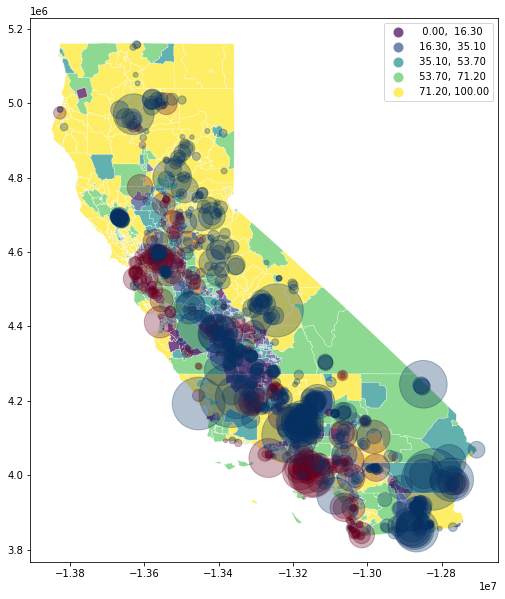

In [33]:
# set up the plot canvas with plt.subplots
fig, ax = plt.subplots(figsize=(10, 10))


# race map
gdf_whitepct.plot(ax=ax, # this puts it in the ax plot
        column = 'White_pct',
        legend=True,
        edgecolor='white',
        linewidth = 0.4,
        scheme='naturalbreaks',
        alpha=0.7)

# cpp_trim
cpp_trim.plot(ax=ax, # this also puts it in the same ax plot
        cmap = 'RdBu',
        column = 'Renewable_Energy', 
        markersize=cpp_trim['Jobs'],
        alpha=0.3)

plt.show()

# Unemployment

In [39]:
gdf_unemp = gdf_ces.sort_values(by='unemp', ascending = False)

# check my work 
gdf_unemp.head()

,tract,pop2010,California,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,edu,...,unempP,Pop_11_64_,Elderly_ov,Hispanic_p,White_pct,African_Am,Native_Ame,Asian_Amer,Other_pct,geometry
7611,6.037980e+09,239,Los Angeles,90744,Wilmington,-118.238420,33.782478,0.00,0,0.0,...,100,75.7,22.6,13.4,76.6,5.0,0.0,3.3,1.7,"POLYGON ((164273.297 -463824.275, 164377.315 -..."
1927,6.067005e+09,1823,Sacramento,95811,Sacramento,-121.482520,38.591604,68.64,99,22.8,...,100,85.5,3.9,20.1,33.1,35.1,2.1,4.1,5.5,"POLYGON ((-128200.623 65063.542, -127338.112 6..."
6095,6.037206e+09,7540,Los Angeles,90013,Los Angeles,-118.243213,34.041111,65.94,98,32.2,...,100,89.1,8.9,24.9,16.7,52.8,1.0,2.3,2.2,"POLYGON ((162143.246 -439764.434, 162518.016 -..."
7771,6.037243e+09,4409,Los Angeles,90059,Los Angeles,-118.250242,33.932376,66.48,99,58.0,...,100,70.1,2.7,59.9,0.9,38.2,0.1,0.2,0.7,"POLYGON ((162154.600 -452488.459, 161414.020 -..."
1911,6.067001e+09,2806,Sacramento,95814,Sacramento,-121.501660,38.581871,62.37,97,38.8,...,100,85.2,14.8,21.6,33.2,24.5,1.6,13.7,5.4,"POLYGON ((-130629.425 64092.211, -130368.955 6..."


In [40]:
gdf_unemp[['California','City','unemp', 'geometry']]

,California,City,unemp,geometry
7611,Los Angeles,Wilmington,100.0,"POLYGON ((164273.297 -463824.275, 164377.315 -..."
1927,Sacramento,Sacramento,60.5,"POLYGON ((-128200.623 65063.542, -127338.112 6..."
6095,Los Angeles,Los Angeles,41.1,"POLYGON ((162143.246 -439764.434, 162518.016 -..."
7771,Los Angeles,Los Angeles,39.7,"POLYGON ((162154.600 -452488.459, 161414.020 -..."
1911,Sacramento,Sacramento,38.3,"POLYGON ((-130629.425 64092.211, -130368.955 6..."
...,...,...,...,...
2875,Marin,San Quentin,0.0,"POLYGON ((-218439.792 -5434.068, -218425.284 -..."
4458,Contra Costa,Danville,0.0,"POLYGON ((-173910.783 -20964.800, -175198.617 ..."
3845,San Bernardino,Victorville,0.0,"POLYGON ((239237.811 -374515.817, 239408.120 -..."
6485,Los Angeles,Los Angeles,0.0,"POLYGON ((156330.169 -427148.499, 156829.129 -..."


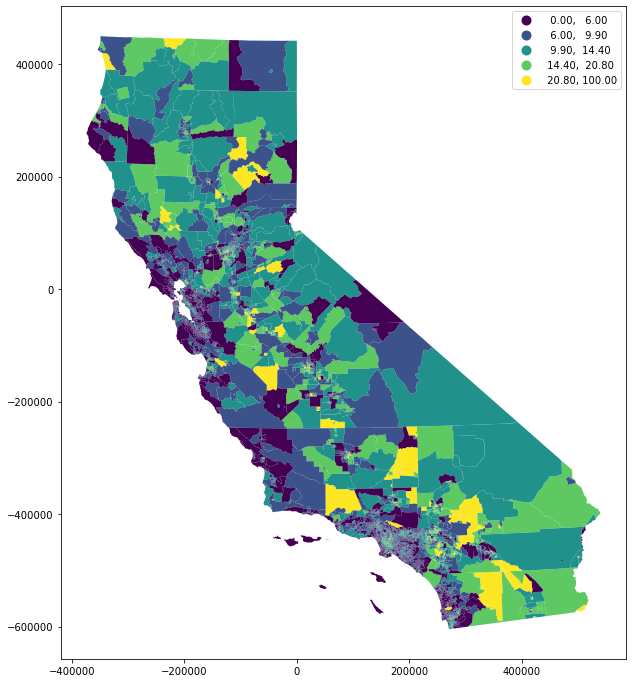

In [42]:
# to map the sorted dataframe using geopandas chloropleth maps
gdf_unemp.plot(figsize=(12,12),
                   column='unemp',
                   cmap='viridis',
                   legend=True,
                   scheme='NaturalBreaks')

In [44]:
#reproject gdf_unemp to web mercator. 

gdf_unemp = gdf_unemp.to_crs(epsg=3857)

#reproject cpp_trim to web mercator
cpp_trim = cpp_trim.to_crs(epsg=3857)

# check work

print(gdf_whitepct.crs)

epsg:3857


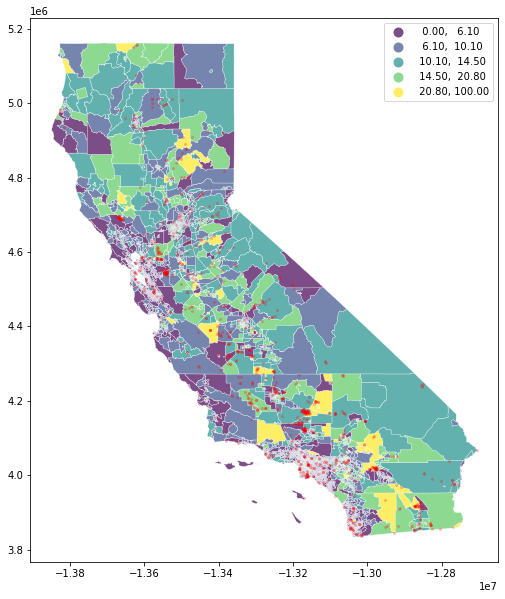

In [56]:
# set up the plot canvas with plt.subplots
fig, ax = plt.subplots(figsize=(10, 10))

# unemployment map
gdf_unemp.plot(ax=ax, # this puts it in the ax plot
        column = 'unemp',
        cmap='viridis',
        legend=True,
        edgecolor='white',
        linewidth = 0.4,
        scheme='naturalbreaks',
        alpha=0.7)

# cpp_trim
cpp_trim.plot(ax=ax, # this also puts it in the same ax plot
            color='red',
            markersize=4,
            alpha=0.2)
plt.show()

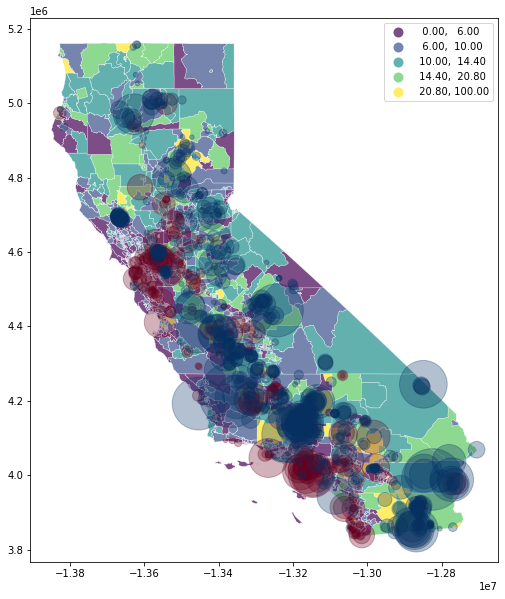

In [57]:
# set up the plot canvas with plt.subplots
fig, ax = plt.subplots(figsize=(10, 10))

# unemployment map
gdf_unemp.plot(ax=ax, # this puts it in the ax plot
        column = 'unemp',
        cmap='viridis',
        legend=True,
        edgecolor='white',
        linewidth = 0.4,
        scheme='naturalbreaks',
        alpha=0.7)

# cpp_trim
cpp_trim.plot(ax=ax, # this also puts it in the same ax plot
        cmap = 'RdBu',
        column = 'Renewable_Energy', 
        markersize=cpp_trim['Jobs'],
        alpha=0.3)

plt.show()